# POLI– Metodos numericos – Trabajo colaborativo


Nombres

In [4]:
#Definición del algoritmo de trazadores cubicos
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
def traza3natural(xi,yi):
    n = len(xi)
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

In [5]:
# INGRESO , Datos de prueba para el calculo de los polinomios
xi = np.array([60 , 120, 180, 240])
fi = np.array([5.5, 7.4, 15.4, 20.1])

import sympy as sp 
x = sp.Symbol('x') 

# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(xi)
px_tabla = traza3natural(xi,fi)
print('Polinomios por trozos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))
h = 0
for tramo in range(1,n,1):
    t = sp.integrate((px_tabla[tramo-1]), (x,(xi[tramo-1]), (xi[tramo])))
    h = h + t
print("El valor de H es igual a: " + str(round(h, 1)))

Polinomios por trozos: 
 x = [60,120]
8.54938271604938e-6*x**3 - 0.00153888888888889*x**2 + 0.0932222222222222*x + 3.6
 x = [120,180]
-1.45061728395062e-5*x**3 + 0.00676111111111111*x**2 - 0.902777777777777*x + 43.44
 x = [180,240]
5.95679012345679e-6*x**3 - 0.00428888888888889*x**2 + 1.08622222222222*x - 75.9
El valor de H es igual a: 2119.2


In [6]:
#Importando la tabla csv
import pandas as pd
datos = pd.read_csv("DatosEMA-2020-03-23.csv", sep=",")
df = pd.DataFrame(datos)
df.head(5)

,time,[HUME],[TEMP],[PRES],[RADI],[RAPV],[DIRV],[PREC]
0,2020-03-23T00:00:00-05:00,81.52,11.81,739.25,-1.97,0.72,47.19,0
1,2020-03-23T00:01:00-05:00,81.70,11.78,738.98,0.83,0.72,47.06,0
2,2020-03-23T00:02:00-05:00,82.35,11.76,738.98,0.09,0.17,62.84,0
3,2020-03-23T00:03:00-05:00,82.73,11.77,738.88,-0.64,0.61,36.79,0
4,2020-03-23T00:04:00-05:00,82.85,11.77,738.78,0.53,0.41,29.56,0


In [7]:
#Definiendo datos a usar ri = radiacion
ndf = pd.DataFrame()
ndf["ri"] = df["[RADI]"]
ndf = ndf.drop(ndf[ndf["ri"] < 0].index)
ndf.head(5)

,ri
1,0.83
2,0.09
4,0.53
7,0.09
69,0.09


In [8]:
# Lista con los números de xi
s = len(ndf)
cantidad = list(range(s))
import sympy as sp 
# INGRESO , Datos de prueba
fi = np.array(ndf["ri"])
xi = np.array((cantidad))
x = sp.Symbol('x')
n = len(xi)
px_tabla = traza3natural(xi,fi)
h = 0

In [9]:
# PROCEDIMIENTO
# Tabla de polinomios por tramos
print('Polinomios por trozos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por trozos: 
 x = [0,1]
0.386348795309543*x**3 - 1.12634879530954*x + 0.83
 x = [1,2]
-0.751743976547716*x**3 + 3.41427831557178*x**2 - 4.54062711088132*x + 1.96809277185726
 x = [2,3]
0.560627110881319*x**3 - 4.45994820900243*x**2 + 11.2078259382671*x - 8.53087592757502
 x = [3,4]
-0.170764466977559*x**3 + 2.12257599172747*x**2 - 8.53974666392262*x + 11.2166966746147
 x = [4,5]
-0.0175692429710815*x**3 + 0.284233303649738*x**2 - 1.18637591161168*x + 1.41220233820011
 x = [5,6]
-0.218958561138115*x**3 + 3.30507307615524*x**2 - 16.2905747741392*x + 26.5858671090793
 x = [6,7]
0.473403487523541*x**3 - 9.15744379975457*x**2 + 58.4845264813197*x - 122.964335401838
 x = [7,8]
-0.35465538895605*x**3 + 8.23179260631684*x**2 - 63.2401283611802*x + 161.059859230661
 x = [8,9]
0.0452180683006583*x**3 - 1.36517036784415*x**2 + 13.5355754321078*x - 43.6753508847733
 x = [9,10]
0.0537831157534167*x**3 - 1.59642664906863*x**2 + 15.616881963128*x - 49.9192704778342
 x = [10,11]
0.009649468

0.0555467627248654*x**3 - 15.526310120257*x**2 + 1449.1092925667*x - 45104.319649749
 x = [95,96]
-0.113487749934408*x**3 + 32.6485259876359*x**2 - 3127.50013768312*x + 99821.6456414955
 x = [96,97]
-1.35159576298722*x**3 + 389.223633746846*x**2 - 37358.7104825673*x + 1195220.37667779
 x = [97,98]
3.43987080188328*x**3 - 1005.09313663047*x**2 + 97890.0162440324*x - 3177821.78748227
 x = [98,99]
-4.46788744454591*x**3 + 1319.78778781971*x**2 - 129948.314352085*x + 4264897.01199091
 x = [99,100]
4.60167897630035*x**3 - 1373.87343917163*x**2 + 136724.147120057*x - 4535294.21658979
 x = [100,101]
-4.69882846065547*x**3 + 1416.27879191512*x**2 - 142291.075988618*x + 4765213.22036603
 x = [101,102]
5.09363486632152*x**3 - 1550.83759615891*x**2 + 157387.679206859*x - 5323971.53788169
 x = [102,103]
-4.8057110046306*x**3 + 1478.36224035244*x**2 - 151590.704117298*x + 5181293.49513967
 x = [103,104]
3.69920915220088*x**3 - 1149.65808810849*x**2 + 119095.389714177*x - 4112262.39307433
 x = [104,

-233.575339164973*x**3 + 128523.518200227*x**2 - 23572987.3430551*x + 1441196442.06482
 x = [184,185]
319.872698512365*x**3 - 176979.798597664*x**2 + 32639622.9477568*x - 2006510322.43831
 x = [185,186]
-374.325454884485*x**3 + 208300.176537588*x**2 - 38637172.4522648*x + 2388892060.56302
 x = [186,187]
355.719121025577*x**3 - 199064.696820227*x**2 + 37132693.9922887*x - 2308839658.9993
 x = [187,188]
-286.971029217821*x**3 + 161484.477466319*x**2 - 30290001.5992954*x + 1893841699.54278
 x = [188,189]
260.524995845707*x**3 - 147303.280669511*x**2 + 27762096.9302407*x - 1744089808.30815
 x = [189,190]
-254.658954165008*x**3 + 144806.018986565*x**2 - 27446560.7047576*x + 1734055622.69674
 x = [190,191]
87.4008208143229*x**3 - 50168.0527516537*x**2 + 9598512.92550392*x - 612132373.886486
 x = [191,192]
196.875670907716*x**3 - 112897.141855168*x**2 + 21579768.9442751*x - 1374939007.08159
 x = [192,193]
-376.183504445187*x**3 + 217184.943148104*x**2 - 41795991.3763531*x + 2681109653.43862
 

-2.26683906120759*x**3 + 2124.55552816495*x**2 - 663706.723846417*x + 69111073.6275411
 x = [312,313]
-6.53517281049262*x**3 + 6119.71591749573*x**2 - 1910196.76531762*x + 198746037.940546
 x = [313,314]
5.03753030317811*x**3 - 4747.05230624108*x**2 + 1491101.688712*x - 156122767.429878
 x = [314,315]
2.4050515977802*x**3 - 2267.25736575625*x**2 + 712446.077399765*x - 74623480.1125302
 x = [315,316]
-3.03773669429892*x**3 + 2876.17757025852*x**2 - 907735.927444887*x + 95495630.3961582
 x = [316,317]
2.08589517941538*x**3 - 1981.02544602264*x**2 + 627140.225699958*x - 66177991.0684321
 x = [317,318]
-2.78584402336257*x**3 + 2651.99853581919*x**2 - 841528.376543902*x + 89011324.5686692
 x = [318,319]
-3.30251908596506*x**3 + 3144.90654554197*x**2 - 998273.123635746*x + 105626267.760405
 x = [319,320]
5.26592036722281*x**3 - 5055.09001115882*x**2 + 1617525.77795181*x - 172520348.775072
 x = [320,321]
1.34883761707379*x**3 - 1294.69057101577*x**2 + 414197.95710603*x - 44165381.2181889
 x =

 x = [402,403]
-1.34164237205214*x**3 + 1621.37315520459*x**2 - 653141.995917291*x + 87702395.7600995
 x = [403,404]
0.883302840822973*x**3 - 1068.58560716141*x**2 + 430911.385316209*x - 57922108.4522674
 x = [404,405]
-0.581568991239745*x**3 + 706.839053298602*x**2 - 286360.177509637*x + 38670462.0082798
 x = [405,406]
0.582973124135963*x**3 - 708.079616882883*x**2 + 286681.883913865*x - 38690216.2838929
 x = [406,407]
-1.33032350530403*x**3 + 1622.31567777503*x**2 - 659458.60571725*x + 89354129.9795179
 x = [407,408]
0.928320897080117*x**3 - 1135.48913753601*x**2 + 462967.954114347*x - 62921739.9709687
 x = [408,409]
-0.0329600830164082*x**3 + 41.1187821021319*x**2 - 17088.0770980165*x + 2365880.27391276
 x = [409,410]
-0.0664805650144938*x**3 + 82.248413513783*x**2 - 33910.0963453818*x + 4659282.23130356
 x = [410,411]
-0.141117656925614*x**3 + 174.052036564461*x**2 - 71549.5817961598*x + 9803345.24290989
 x = [411,412]
-0.839048807283048*x**3 + 1034.60114495518*x**2 - 425235.265344

-2.25389258387468*x**3 + 3285.62239397121*x**2 - 1596561.28781815*x + 258605288.37526
 x = [486,487]
1.79209405228785*x**3 - 2613.42612155377*x**2 + 1270376.29072699*x - 205838599.349053
 x = [487,488]
-0.50448362527673*x**3 + 741.873865368085*x**2 - 363654.802903958*x + 59419114.8503702
 x = [488,489]
-3.00415955118095*x**3 + 4401.39942089186*x**2 - 2149503.27399956*x + 349917132.815255
 x = [489,490]
3.1011218300006*x**3 - 4555.04836530148*x**2 + 2230199.69344898*x - 363974450.878857
 x = [490,491]
-1.15032776882155*x**3 + 1694.58254496709*x**2 - 832119.452582616*x + 136204342.97297
 x = [491,492]
-1.15981075471435*x**3 + 1708.55098318718*x**2 - 838977.955748679*x + 137326851.324482
 x = [492,493]
2.6995707876789*x**3 - 3987.89617338525*x**2 + 1963674.04528496*x - 322308076.845034
 x = [493,494]
-2.85847239600122*x**3 + 4232.44969527765*x**2 - 2088956.46796585*x + 343674204.165849
 x = [494,495]
2.98431879632596*x**3 - 4426.56685175124*x**2 + 2188597.70626642*x - 360696383.191064
 x 

-355.15738998725*x**3 + 621930.332110122*x**2 - 363028566.403905*x + 70634690579.0638
 x = [584,585]
69.542905094564*x**3 - 122144.584873217*x**2 + 71511185.1143651*x - 13955714383.1594
 x = [585,586]
68.4557696089941*x**3 - 120236.662096042*x**2 + 70395050.2897176*x - 13738068092.3531
 x = [586,587]
-127.535983530541*x**3 + 224316.83992326*x**2 - 131513301.893593*x + 25701363367.4536
 x = [587,588]
135.588164513168*x**3 - 239044.784781711*x**2 + 140479971.808224*x - 27518653853.5354
 x = [588,589]
-39.3266745221312*x**3 + 69504.9912765572*x**2 - 40947296.514037*x + 8041090737.62786
 x = [589,590]
164.058533575357*x**3 - 289876.671431704*x**2 + 170728502.821129*x - 33517924531.8431
 x = [590,591]
-379.637459779297*x**3 + 672465.236806032*x**2 - 397053223.039136*x + 78145814887.3423
 x = [591,592]
263.73130554183*x**3 - 468227.584108324*x**2 + 277096234.121249*x - 54661628173.2535
 x = [592,593]
45.5822376119782*x**3 - 80794.8394649083*x**2 + 47736049.2923469*x - 9401218367.01678
 x = [

-2.85519989983769*x**3 + 6549.14593134407*x**2 - 5007389.54344777*x + 1276193885.05433
 x = [765,766]
1.1204776670245*x**3 - 2575.03408460466*x**2 + 1972608.168753*x - 503705531.556863
 x = [766,767]
1.19328923173969*x**3 - 2742.35506032018*x**2 + 2100776.03615109*x - 536431060.365842
 x = [767,768]
-2.39363459398328*x**3 + 5511.15666266838*x**2 - 4229667.45538113*x + 1082052325.6359
 x = [768,769]
1.64124914419342*x**3 - 3785.21547009073*x**2 + 2909946.34257787*x - 745688806.641607
 x = [769,770]
-0.361361982790417*x**3 + 834.808399860984*x**2 - 642852.013415003*x + 165011838.611232
 x = [770,771]
0.104198786968255*x**3 - 240.636978281547*x**2 + 185240.927754746*x - 47532016.2890035
 x = [771,772]
-0.795433165082605*x**3 + 1840.21172681209*x**2 - 1419093.42387245*x + 364781912.079186
 x = [772,773]
1.76753387336216*x**3 - 4095.619934226*x**2 + 3163368.61844895*x - 814438320.144855
 x = [773,774]
-1.44470232836605*x**3 + 3353.55581758174*x**2 - 2594844.23769843*x + 669261192.455787
 x 

In [ ]:
#Ejecundo calculo de integral
for tramo in range(1,n,1):
    t = sp.integrate((px_tabla[tramo-1]), (x,(xi[tramo-1]), (xi[tramo])))
    h = h + t
print("El valor de H es igual a: " + str(round(h, 1)))

In [10]:
# GRAFICA
# Puntos para graficar cada tramo
import numpy as np
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
muestras = 1 # entre cada par de puntos
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)
    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1


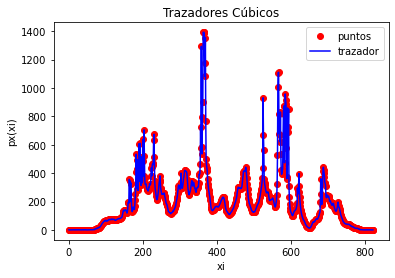

In [11]:
# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

In [79]:
#Importando la tabla csv
from datetime import datetime
rad_arr = []
with open('DatosEMA-2020-03-23.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if row[0] == 'time':
            continue
        fecha_string = row[0].replace('2020-03-23T', '')
        fecha_string = fecha_string.replace('-05:00', '')
        hora_minutos = datetime.strptime(fecha_string, '%H:%M:%S')
        if 6 <= hora_minutos.hour <= 17:
            rad_arr.append(
                float(row[4])
            )

In [80]:
# Lista con los números de xi
s = len(rad_arr)
cantidad = list(range(s))
import sympy as sp 
# INGRESO , Datos de prueba
fi = np.array(rad_arr)
xi = np.array((cantidad))
x = sp.Symbol('x')
n = len(xi)
px_tabla = traza3natural(xi,fi)
h = 0

In [81]:
# PROCEDIMIENTO
# Tabla de polinomios por tramos
print('Polinomios por trozos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por trozos: 
 x = [0,1]
0.13689181681253*x**3 + 0.45310818318747*x + 1.86
 x = [1,2]
-0.984459084062649*x**3 + 3.36405270262554*x**2 - 2.91094451943807*x + 2.98135090087518
 x = [2,3]
2.63094451943807*x**3 - 18.3283689183788*x**2 + 40.4738987225705*x - 25.9418779271306
 x = [3,4]
-2.91931899368962*x**3 + 31.6240026997704*x**2 - 109.383216131877*x + 123.915236927317
 x = [4,5]
0.956331455320406*x**3 - 14.8838026883499*x**2 + 76.6480054206042*x - 124.126391809325
 x = [5,6]
0.713993172407995*x**3 - 11.2487284446637*x**2 + 58.4726342021734*x - 93.8341064452732
 x = [6,7]
-0.732304144952387*x**3 + 14.7846232678232*x**2 - 97.7274760727479*x + 218.566114104569
 x = [7,8]
0.455223407401551*x**3 - 10.1534553316095*x**2 + 76.8390741232811*x - 188.755836352832
 x = [8,9]
-1.23858948465382*x**3 + 30.4980540777194*x**2 - 248.373001151351*x + 678.476364379519
 x = [9,10]
2.29913453121374*x**3 - 65.0204943507047*x**2 + 611.293934704467*x - 1900.52444318793
 x = [10,11]
-1.77794864020114*x

4.30019448775184*x**3 - 1412.61374310236*x**2 + 154667.623820496*x - 5644225.54191367
 x = [110,111]
2.55931877626285*x**3 - 838.124758310996*x**2 + 91473.8354934457*x - 3327119.96992183
 x = [111,112]
-0.10746959280318*x**3 + 49.9157685879918*x**2 - 7098.66299234199*x + 320062.474052319
 x = [112,113]
-11.6894404050502*x**3 + 3941.45796150299*x**2 - 442951.388598822*x + 16591897.5633609
 x = [113,114]
34.505231213004*x**3 - 11718.5357170174*x**2 + 1326627.89707398*x - 50062255.5303146
 x = [114,115]
-20.1814844469658*x**3 + 6984.32103869229*x**2 - 805497.773076923*x + 30958519.9354197
 x = [115,116]
-90.7892934251407*x**3 + 31344.0151361626*x**2 - 3606862.59428601*x + 138344171.415101
 x = [116,117]
180.438658147529*x**3 - 63043.3120111263*x**2 + 7342067.3547995*x - 285014453.282872
 x = [117,118]
-233.575339164973*x**3 + 82275.6010455619*x**2 - 9660245.47283301*x + 378075746.994796
 x = [118,119]
319.872698512365*x**3 - 113645.004292216*x**2 + 13458385.9570247*x - 531257089.246276
 x

1.24902769430118*x**3 - 993.425387015219*x**2 + 263321.260186796*x - 23260315.9340311
 x = [269,270]
-3.86089687736596*x**3 + 3130.28374232016*x**2 - 845956.495604422*x + 76204922.8352482
 x = [270,271]
-6.97544018483746*x**3 + 5653.06382137208*x**2 - 1527107.11694844*x + 137508478.75621
 x = [271,272]
5.58265761671581*x**3 - 4556.66969129073*x**2 + 1239730.66498318*x - 112429200.87828
 x = [272,273]
0.0848097179743343*x**3 - 70.425805917686*x**2 + 19472.3281617144*x - 1792445.00646701
 x = [273,274]
4.80810351138681*x**3 - 3938.80342272251*x**2 + 1075539.41754943*x - 97894550.1407492
 x = [274,275]
-8.42722376352166*x**3 + 6940.63559725226*x**2 - 1905426.87392365*x + 174367037.813793
 x = [275,276]
3.74079154269991*x**3 - 3097.97703038053*x**2 + 855191.598675363*x - 78689655.5077839
 x = [276,277]
1.57405759272199*x**3 - 1303.92131979882*x**2 + 360032.22255481*x - 33134992.9046931
 x = [277,278]
5.09297808641207*x**3 - 4228.14425005527*x**2 + 1170041.97423585*x - 107925893.309909
 x =

-0.703187842844751*x**3 + 783.880745961617*x**2 - 291272.759361569*x + 36076335.9706042
 x = [372,373]
0.170585463405796*x**3 - 191.250263813994*x**2 + 71475.9762749579*x - 8904507.2483252
 x = [373,374]
0.170845989221587*x**3 - 191.541792201864*x**2 + 71584.7163636337*x - 8918027.26601722
 x = [374,375]
0.74603057970782*x**3 - 836.898902727417*x**2 + 312948.275700191*x - 39008017.663308
 x = [375,376]
-1.66496830805283*x**3 + 1875.47484600331*x**2 - 704191.880073834*x + 88134501.8084451
 x = [376,377]
1.3538426525035*x**3 - 1529.74391750423*x**2 + 576170.375005001*x - 72337567.4947689
 x = [377,378]
-1.1204023019612*x**3 + 1268.62712599535*x**2 - 478815.508394338*x + 60238991.8524147
 x = [378,379]
1.96776655534133*x**3 - 2233.35635818572*x**2 + 844934.248626105*x - 106553477.532161
 x = [379,380]
-2.20066391940411*x**3 + 2506.14909159984*x**2 - 951338.316842623*x + 120375623.238722
 x = [380,381]
1.69488912227506*x**3 - 1934.78137591441*x**2 + 736215.260812794*x - 93381163.264298
 x 

-3.55219825984614*x**3 + 5253.37906540888*x**2 - 2589743.08388376*x + 425550593.490804
 x = [493,494]
0.902123547278458*x**3 - 1334.5628873284*x**2 + 658112.298815714*x - 108180307.73281
 x = [494,495]
1.43370407073226*x**3 - 2122.36522308694*x**2 + 1047286.65268043*x - 172264351.335867
 x = [495,496]
6.44306016979251*x**3 - 9561.25903019141*x**2 + 4729539.08719715*x - 779836003.031125
 x = [496,497]
-4.13594474990229*x**3 + 6180.30029031446*x**2 - 3078274.33577377*x + 511055816.2334
 x = [497,498]
94.0707188298167*x**3 - 140245.835107046*x**2 + 69695514.9567146*x - 11545135276.5555
 x = [498,499]
-228.666930569364*x**3 + 341924.21309533*x**2 - 170425169.048069*x + 28314898268.2385
 x = [499,500]
181.647003447641*x**3 - 272315.746128127*x**2 + 136080570.604436*x - 22667223093.9614
 x = [500,501]
-228.881083221198*x**3 + 343476.383875132*x**2 - 171815494.397193*x + 28648787739.6434
 x = [501,502]
399.107329437153*x**3 - 600390.20035037*x**2 + 301061664.299783*x - 50321697762.7516
 x = [

1.80010296634492*x**3 - 3550.72847883423*x**2 + 2334624.62065793*x - 511677151.087062
 x = [658,659]
-0.459450494928575*x**3 + 909.630053719644*x**2 - 600291.29376252*x + 132047739.475823
 x = [659,660]
3.26769901336937*x**3 - 6458.9445241854*x**2 + 4255599.3530769*x - 934629572.613238
 x = [660,661]
-6.58134555854889*x**3 + 13042.1637282128*x**2 - 8615132.09350589*x + 1896931345.63498
 x = [661,662]
-7.23231677917385*x**3 + 14333.0396587121*x**2 - 9468401.08356592*x + 2084934946.44487
 x = [662,663]
17.5806126752444*x**3 - 34945.4382377625*x**2 + 23153951.2839002*x - 5113730809.30933
 x = [663,664]
-7.81013392180362*x**3 + 15556.7567437659*x**2 - 10329003.9888531*x + 2286002305.96916
 x = [664,665]
-0.900076988029803*x**3 + 1791.92333168848*x**2 - 1189154.60323368*x + 263048975.285395
 x = [665,666]
0.240441873922819*x**3 - 483.411797907001*x**2 + 323943.257947312*x - 72354383.943059
 x = [666,667]
1.54830949233851*x**3 - 3096.53129950155*x**2 + 2064280.84600928*x - 458709328.492816
 

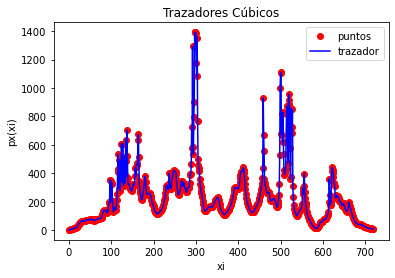

In [82]:
# GRAFICA
# Puntos para graficar cada tramo
import numpy as np
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
muestras = 1 # entre cada par de puntos
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)
    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1
    
# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

In [ ]:
#Ejecundo calculo de integral
for tramo in range(1,n,1):
    t = sp.integrate((px_tabla[tramo-1]), (x,(xi[tramo-1]), (xi[tramo])))
    h = h + t
    print(h)
print("El valor de H es igual a: " + str(round(h, 1)))

2.12077704579687
4.89344590840627
6.80949341217181
10.1926345345003
16.5665225414211
22.8928293914098
29.8137139845344
38.2738687620469
48.3248650588705
58.2557250940574
68.9412886564853
82.3281743715705
95.9525679487850
110.990607924781
127.864054443555
144.479728392514
162.971086077872
183.357481387487
205.823042463817
232.976902848910
264.160900232324
298.098550313618
336.606452604988
380.062193357851
427.136328054767
477.619048514287
531.166531979426
587.596377659487
646.684511474119
708.797130535553
773.851020475347
838.607841655575
904.426666996405
970.652044451759
1036.68170928020
1101.80267250720
1166.33665476969
1231.14726249358
1295.03334933097
1362.18839425357
1431.44712772543
1503.40714892322
1577.46583067017
1651.22858249160
1724.43639346162
1798.06989776898
1871.77306957632
1944.17687804202
2018.95347237583
2095.37078659047
2169.10243540254
2242.87602594398
2317.36751499303
2391.30046825945
